In [1]:
import akshare as ak
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()
#设置字体为SimHei显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
#设置正常显示字符
plt.rcParams['axes.unicode_minus'] = False



In [2]:
# 此处的收益率都是到期收益率存在一定问题

'''
例如对于3+2Y的，应该考虑行权收益率
以19中国银行二级01为例，3.79+5Y，票面3.98%
如果考虑到期收益率为4.07（也就是网站口径）
如果考虑行权收益率为4.19（中债估值数据）（因票面利率略低于ytm，因此期限越短收益率越高）
此处存在一定的问题

'''

bond_df_raw = ak.bond_spot_deal()
bond_df_raw

,债券简称,成交净价(元),最新收益率(%),涨跌(BP),加权收益率(%),交易量(亿)
0,20国开15,100.02,3.6960,-1.80,3.7001,None
1,20国开10,94.97,3.7250,-1.50,3.7322,None
2,20国开12,99.77,3.3925,-1.75,3.4037,None
3,20附息国债13,99.63,3.1025,-2.00,3.1099,None
4,20附息国债14,99.64,3.0100,-2.48,3.0221,None
...,...,...,...,...,...,...
1842,17保定银行二级,100.70,5.5635,NaN,5.5635,None
1843,20新都香城CP001,99.45,4.6733,0.54,4.6733,None
1844,18农发03,103.73,3.1436,-0.64,3.1436,None
1845,15进出08,103.79,3.3300,-3.00,3.3300,None


In [4]:
# bond_df_raw.to_csv('债券成交_1208.csv',encoding='gbk')
# bond_df_raw=pd.read_csv('债券成交_1207.csv',encoding='gbk',index_col=0)
bond_df_raw

,债券简称,成交净价(元),最新收益率(%),涨跌(BP),加权收益率(%),交易量(亿)
0,20国开15,100.02,3.6960,-1.80,3.7001,None
1,20国开10,94.97,3.7250,-1.50,3.7322,None
2,20国开12,99.77,3.3925,-1.75,3.4037,None
3,20附息国债13,99.63,3.1025,-2.00,3.1099,None
4,20附息国债14,99.64,3.0100,-2.48,3.0221,None
...,...,...,...,...,...,...
1842,17保定银行二级,100.70,5.5635,NaN,5.5635,None
1843,20新都香城CP001,99.45,4.6733,0.54,4.6733,None
1844,18农发03,103.73,3.1436,-0.64,3.1436,None
1845,15进出08,103.79,3.3300,-3.00,3.3300,None


In [599]:
bond_df_raw[bond_df_raw['债券简称'].apply(lambda x:True if re.search('渝水投',x) else False)]

,债券简称,成交净价(元),最新收益率(%),涨跌(BP),加权收益率(%),交易量(亿),剩余期限,是否永续
885,20渝水投MTN001,97.46,3.9091,NaN,3.9084,NaN,4.3753,否


In [434]:
bond_df_raw.set_index('债券简称')

,成交净价(元),最新收益率(%),涨跌(BP),加权收益率(%),交易量(亿),剩余期限,是否永续
债券简称,,,,,,,


In [345]:
bond_china_yield_df = ak.bond_china_yield(start_date="2020-10-01", end_date="2020-12-31")
bond_china_yield_df

,曲线名称,日期,3月,6月,1年,3年,5年,7年,10年,30年
0,中债国债收益率曲线,2020-12-07,2.8340,2.8509,2.8614,3.0420,3.1261,3.2738,3.2701,3.8545
1,中债商业银行普通债收益率曲线(AAA),2020-12-07,3.0622,3.1558,3.2231,3.5400,3.7560,3.8910,3.9761,4.4655
2,中债中短期票据收益率曲线(AAA),2020-12-07,3.1619,3.2751,3.4542,3.8201,3.9522,4.1341,4.2754,NaN
3,中债国债收益率曲线,2020-12-04,2.8551,2.8738,2.8708,3.0348,3.1156,3.2701,3.2651,3.8566
4,中债商业银行普通债收益率曲线(AAA),2020-12-04,3.1319,3.1612,3.2200,3.5400,3.7379,3.8729,3.9580,4.4474
...,...,...,...,...,...,...,...,...,...,...
124,中债商业银行普通债收益率曲线(AAA),2020-10-10,2.6567,2.9770,3.1182,3.4545,3.7109,3.8679,3.9984,4.5070
125,中债中短期票据收益率曲线(AAA),2020-10-10,2.7237,3.1333,3.2036,3.7650,4.0078,4.1868,4.3207,NaN
126,中债国债收益率曲线,2020-10-09,2.3662,2.6009,2.7017,2.9897,3.1147,3.2619,3.1873,3.8834
127,中债商业银行普通债收益率曲线(AAA),2020-10-09,2.7428,2.9899,3.1179,3.4357,3.6919,3.8489,3.9794,4.4880


In [101]:
today_line=bond_china_yield_df[bond_china_yield_df['曲线名称']=='中债中短期票据收益率曲线(AAA)'].iloc[0]
today_line=today_line.iloc[2:-1]
today_line.index=[3/12,6/12,1,3,5,7,10]
today_line

0.25     3.1619
0.50     3.2751
1.00     3.4542
3.00     3.8201
5.00     3.9522
7.00     4.1341
10.00    4.2754
Name: 2, dtype: object

In [409]:
basic_info=pd.read_excel('基础资料.xlsx')
basic_info.columns=pd.Series(basic_info.columns).apply(lambda x:re.split('\(|\[|↑',x)[0])
basic_info.set_index('证券简称',inplace=True)
basic_info

,证券代码,剩余期限,行权剩余期限,是否永续债,发行总额,债券余额,债券期限,票面利率,起息日期
证券简称,,,,,,,,,
01国开14,010214.IB,0.8685,NaN,否,1900-04-09 00:00:00,1900-04-09 00:00:00,20.0000,4.20,2001-10-20
01国开16,010216.IB,0.9123,NaN,否,1900-04-09 00:00:00,1900-04-09 00:00:00,20.0000,4.23,2001-11-05
01国开21,010221.IB,11.0984,NaN,否,1900-05-29 00:00:00,1900-05-29 00:00:00,30.0000,4.52,2002-01-12
01国债11,010011.IB,0.8767,NaN,否,1900-06-08 00:00:00,1900-06-08 00:00:00,20.0000,3.85,2001-10-23
01国债7,010007.IB,0.6466,NaN,否,1900-08-27 00:00:00,1900-08-27 00:00:00,20.0000,4.26,2001-07-31
...,...,...,...,...,...,...,...,...,...
20浙资运营SCP002,012001414.IB,0.0984,NaN,否,1900-01-06 00:00:00,1900-01-06 00:00:00,0.7397,1.90,2020-04-17
20中再资环绿色ABN001次,082000315.IB,2.4932,NaN,否,03:36:00,03:36:00,3.0000,NaN,2020-06-05
20中再资环绿色ABN001优先,082000314.IB,2.4932,NaN,否,1900-01-02 20:24:00,1900-01-02 20:24:00,3.0000,5.10,2020-06-05


In [437]:
basic_info['名义剩余期限']=basic_info['剩余期限']
real_year=[]
for index,one in basic_info.iterrows():
    if one['行权剩余期限']=='NaN':
        real_year.append(one['行权剩余期限'])
    else:
        real_year.append(one['剩余期限'])
basic_info['剩余期限']=real_year

basic_info=basic_info[basic_info['行权剩余期限'].isnull()]# 去掉含权债
basic_info

,证券代码,剩余期限,行权剩余期限,是否永续债,发行总额,债券余额,债券期限,票面利率,起息日期,名义剩余期限
证券简称,,,,,,,,,,
01国开14,010214.IB,0.8685,NaN,否,1900-04-09 00:00:00,1900-04-09 00:00:00,20.0000,4.20,2001-10-20,0.8685
01国开16,010216.IB,0.9123,NaN,否,1900-04-09 00:00:00,1900-04-09 00:00:00,20.0000,4.23,2001-11-05,0.9123
01国开21,010221.IB,11.0984,NaN,否,1900-05-29 00:00:00,1900-05-29 00:00:00,30.0000,4.52,2002-01-12,11.0984
01国债11,010011.IB,0.8767,NaN,否,1900-06-08 00:00:00,1900-06-08 00:00:00,20.0000,3.85,2001-10-23,0.8767
01国债7,010007.IB,0.6466,NaN,否,1900-08-27 00:00:00,1900-08-27 00:00:00,20.0000,4.26,2001-07-31,0.6466
...,...,...,...,...,...,...,...,...,...,...
20浙资运营SCP001,012001252.IB,0.0765,NaN,否,1900-01-10 00:00:00,1900-01-10 00:00:00,0.7397,1.95,2020-04-09,0.0765
20浙资运营SCP002,012001414.IB,0.0984,NaN,否,1900-01-06 00:00:00,1900-01-06 00:00:00,0.7397,1.90,2020-04-17,0.0984
20中再资环绿色ABN001次,082000315.IB,2.4932,NaN,否,03:36:00,03:36:00,3.0000,NaN,2020-06-05,2.4932


In [440]:
no_info_list=[]
for index,one in bond_df.iterrows():
    if one['债券简称'] not in basic_info.index.tolist():
        no_info_list.append(index)
no_info_list
bond_df=bond_df_raw.drop(no_info_list)
bond_df

,债券简称,成交净价(元),最新收益率(%),涨跌(BP),加权收益率(%),交易量(亿),剩余期限,是否永续
0,20国开15,99.88,3.7140,-0.10,3.7183,NaN,9.8685,否
1,20附息国债17,99.97,3.2850,NaN,3.3115,NaN,6.9890,否
2,20附息国债14,99.57,3.0348,-0.27,3.0587,NaN,2.9123,否
3,20国开10,94.86,3.7400,-0.25,3.7479,NaN,9.5288,否
4,20国开12,99.69,3.4100,0.25,3.4108,NaN,4.6000,否
...,...,...,...,...,...,...,...,...
1603,20潍坊滨投SCP003,99.59,4.8199,-10.04,4.8199,NaN,0.4767,否
1605,16大连万达MTN001,99.66,4.7189,3.39,4.7189,NaN,0.3068,否
1606,16兰州城投PPN003,99.85,4.2526,-18.43,4.2526,NaN,0.8411,否
1607,19阳煤PPN009,99.27,6.0436,150.33,6.0436,NaN,1.7041,否


In [441]:
bond_df['剩余期限']=basic_info.loc[bond_df['债券简称'].tolist()]['剩余期限'].tolist() # 去除掉无数据点的成交数据
bond_df['是否永续']=basic_info.loc[bond_df['债券简称'].tolist()]['是否永续债'].tolist() # 是否永续
bond_df[['最新收益率(%)','加权收益率(%)']]=bond_df[['最新收益率(%)','加权收益率(%)']].astype(float,float)
bond_df

,债券简称,成交净价(元),最新收益率(%),涨跌(BP),加权收益率(%),交易量(亿),剩余期限,是否永续
0,20国开15,99.88,3.7140,-0.10,3.7183,NaN,9.8685,否
1,20附息国债17,99.97,3.2850,NaN,3.3115,NaN,6.9890,否
2,20附息国债14,99.57,3.0348,-0.27,3.0587,NaN,2.9123,否
3,20国开10,94.86,3.7400,-0.25,3.7479,NaN,9.5288,否
4,20国开12,99.69,3.4100,0.25,3.4108,NaN,4.6000,否
...,...,...,...,...,...,...,...,...
1603,20潍坊滨投SCP003,99.59,4.8199,-10.04,4.8199,NaN,0.4767,否
1605,16大连万达MTN001,99.66,4.7189,3.39,4.7189,NaN,0.3068,否
1606,16兰州城投PPN003,99.85,4.2526,-18.43,4.2526,NaN,0.8411,否
1607,19阳煤PPN009,99.27,6.0436,150.33,6.0436,NaN,1.7041,否


In [442]:
day_line=pd.Series(index=[i for i in range(1,11)],dtype=float)
for one in day_line.index:
    if one in today_line.index:
        day_line.loc[one]=today_line[one]
    else:
        year0=(today_line[today_line.index<one].index[-1])
        year1=(today_line[today_line.index>one].index[0])
        rate0=(today_line[today_line.index<one].iloc[-1])
        rate1=(today_line[today_line.index>one].iloc[0])
        day_line.loc[one]=round((rate0+(one-year0)/(year1-year0)*(rate1-rate0)),4)
day_line

1     3.4542
2     3.6372
3     3.8201
4     3.8862
5     3.9522
6     4.0432
7     4.1341
8     4.1812
9     4.2283
10    4.2754
dtype: float64

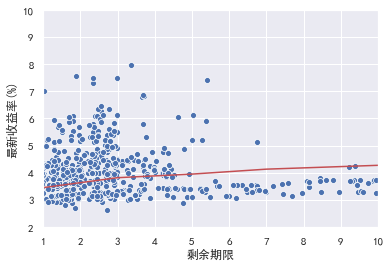

In [443]:
sns.scatterplot(bond_df['剩余期限'],bond_df['最新收益率(%)'])
plt.ylim(2,10)
plt.xlim(1,10)
plt.plot(day_line,'r')

In [444]:
small_df=bond_df[(bond_df['是否永续']=='否')][['债券简称','剩余期限','最新收益率(%)']]
small_df.dropna(inplace=True)

small_df['最新收益率(%)']=small_df['最新收益率(%)'].astype(float)
small_df['主体']=small_df['债券简称'].apply(lambda x:re.findall('[^\x00-\xff]+',x)[0])
small_df=small_df[(small_df['剩余期限']>1)&(small_df['剩余期限']<10)]
small_df=small_df[(small_df['最新收益率(%)']<10)]


small_df

,债券简称,剩余期限,最新收益率(%),主体
0,20国开15,9.8685,3.7140,国开
1,20附息国债17,6.9890,3.2850,附息国债
2,20附息国债14,2.9123,3.0348,附息国债
3,20国开10,9.5288,3.7400,国开
4,20国开12,4.6000,3.4100,国开
...,...,...,...,...
1586,20泰州城投PPN003,2.9315,4.3659,泰州城投
1591,20大同煤矿PPN007,2.3671,5.6834,大同煤矿
1595,20大同煤矿PPN003,2.2268,5.7424,大同煤矿
1607,19阳煤PPN009,1.7041,6.0436,阳煤


In [563]:
def pred_rate(year):
    y0=int(year)
    rate=day_line.loc[y0]+(year-y0)*(day_line.loc[y0+1]-day_line.loc[y0])
    return rate
small_df['比较基准']=small_df['剩余期限'].apply(lambda x:pred_rate(x))
small_df['利差']=small_df['最新收益率(%)']-small_df['比较基准']

small_df=small_df[(small_df['利差']<3)] # 利差小于300bp的
small_df[0]=0

# sns.scatterplot(small_df['剩余期限'],small_df['利差'])
small_df


,债券简称,剩余期限,最新收益率(%),主体,比较基准,利差,0,分组
0,20国开15,9.8685,3.7140,国开,4.269206,-0.555206,0,1
1,20附息国债17,6.9890,3.2850,附息国债,4.133100,-0.848100,0,6
2,20附息国债14,2.9123,3.0348,附息国债,3.804060,-0.769260,0,6
3,20国开10,9.5288,3.7400,国开,4.253206,-0.513206,0,1
4,20国开12,4.6000,3.4100,国开,3.925800,-0.515800,0,1
...,...,...,...,...,...,...,...,...
1586,20泰州城投PPN003,2.9315,4.3659,泰州城投,3.807571,0.558329,0,0
1591,20大同煤矿PPN007,2.3671,5.6834,大同煤矿,3.704343,1.979057,0,2
1595,20大同煤矿PPN003,2.2268,5.7424,大同煤矿,3.678682,2.063718,0,2
1607,19阳煤PPN009,1.7041,6.0436,阳煤,3.583050,2.460550,0,5


In [568]:
# avg_premium意味各个主体的平均利差
avg_premium=pd.DataFrame([[one[0],one[1]['利差'].mean()] for one in small_df.groupby('主体')])
avg_premium.columns=['名称','利差']
avg_premium.sort_values('利差',inplace=True)
avg_premium=avg_premium[avg_premium['名称'].apply(lambda x:False if re.search('国开|农发|国债|进出|铁道',x) else True)] # 去掉国债地方债
province=['青海债','山西债','福建','内蒙古债','厦门债','广西债','深圳债','湖北债','浙江债','广东债','云南','青岛','内蒙','黑龙江债','宁波','海南债','四川债','山东','江苏债','浙江','山东债','宁波债','安徽债','上海债','湖南债','辽宁债','四川','天津债']
avg_premium=avg_premium[avg_premium['名称'].apply(lambda x:False if re.search('|'.join(province),x) else True)] # 去掉国债地方债

avg_premium['与汇金差']=(avg_premium['利差']-avg_premium[avg_premium['名称']=='汇金']['利差'].values[0])*100
import traceback
try:
    avg_premium.to_excel('主体利差.xlsx')
except:
    traceback.print_exc()
avg_premium

Traceback (most recent call last):
  File "C:\Users\zikep\anaconda3\lib\site-packages\xlsxwriter\workbook.py", line 316, in close
    self._store_workbook()
  File "C:\Users\zikep\anaconda3\lib\site-packages\xlsxwriter\workbook.py", line 632, in _store_workbook
    raise e
  File "C:\Users\zikep\anaconda3\lib\site-packages\xlsxwriter\workbook.py", line 630, in _store_workbook
    allowZip64=self.allow_zip64)
  File "C:\Users\zikep\anaconda3\lib\zipfile.py", line 1240, in __init__
    self.fp = io.open(file, filemode)
PermissionError: [Errno 13] Permission denied: '主体利差.xlsx'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-568-2fd15c83fbf6>", line 12, in <module>
    avg_premium.to_excel('主体利差.xlsx')
  File "C:\Users\zikep\anaconda3\lib\site-packages\pandas\core\generic.py", line 2181, in to_excel
    engine=engine,
  File "C:\Users\zikep\anaconda3\lib\site-packages\pandas\io\formats\excel.py", line 738, in 

,名称,利差,与汇金差
138,建设银行双创债,-0.258366,-18.595802
278,锦江国际,-0.247071,-17.466298
44,兴业绿色金融,-0.216013,-14.360474
159,晋焦煤,-0.214144,-14.173614
38,交通银行,-0.211382,-13.897411
...,...,...,...
102,孝感高创,2.548083,262.049118
45,兴安债,2.600289,267.269713
254,许昌建投,2.646584,271.899247
187,泗阳专项债,2.909560,298.196800


In [590]:
test=pd.DataFrame(columns=np.arange(20))
for i in range(10):
    test[2*i]=avg_premium['名称'].iloc[int(len(avg_premium)/10)*i:int(len(avg_premium)/10)*(i+1)].tolist()
    test[2*i+1]=avg_premium['利差'].iloc[int(len(avg_premium)/10)*i:int(len(avg_premium)/10)*(i+1)].tolist()

test.to_excel('test.xlsx')

In [591]:
small_df_s=small_df[small_df['主体'].apply(lambda x:False if re.search('国开|农发|国债|进出|铁道',x) else True)] # 去掉国债地方债
province=['青海债','山西债','福建','内蒙古债','厦门债','广西债','深圳债','湖北债','浙江债','广东债','云南','青岛','内蒙','黑龙江债','宁波','海南债','四川债','山东','江苏债','浙江','山东债','宁波债','安徽债','上海债','湖南债','辽宁债','四川','天津债']
small_df_s=small_df_s[small_df_s['主体'].apply(lambda x:False if re.search('|'.join(province),x) else True)] # 去掉国债地方债

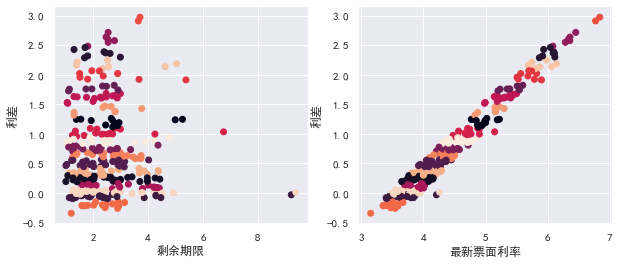

In [592]:
from sklearn.cluster import KMeans
import numpy as np


# y_pred = KMeans(n_clusters=10, random_state=9).fit_predict(small_df[['最新收益率(%)','利差']])
y_pred = KMeans(n_clusters=20, random_state=9).fit_predict(small_df_s[['利差',0]])

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(small_df_s['剩余期限'],small_df_s['利差'], c=y_pred)
plt.xlabel('剩余期限')
plt.ylabel('利差')
plt.subplot(122)
plt.scatter(small_df_s['最新收益率(%)'],small_df_s['利差'], c=y_pred)
plt.xlabel('最新票面利率')
plt.ylabel('利差')
plt.show()

,名称,利差,与汇金差,pred
138,建设银行双创债,-0.258366,-18.595802,14
278,锦江国际,-0.247071,-17.466298,14
44,兴业绿色金融,-0.216013,-14.360474,14
159,晋焦煤,-0.214144,-14.173614,14
38,交通银行,-0.211382,-13.897411,14
...,...,...,...,...
102,孝感高创,2.548083,262.049118,18
45,兴安债,2.600289,267.269713,18
254,许昌建投,2.646584,271.899247,18
187,泗阳专项债,2.909560,298.196800,9


In [527]:
small_df_s['分组']=y_pred
clus_df=pd.DataFrame(columns=['i','len','r0','r1','bond'])
for one in small_df_s.groupby('分组'):
    company_name=list(set(one[1]['主体'].tolist()))
    
    i,lens=one[0],len(company_name)
    r0,r1=one[1]['利差'].min(),one[1]['利差'].max()
#     print(company_name[:10])
    clus_df.loc[i]=[i,lens,r0,r1,company_name]
clus_df.sort_values('r0',inplace=True)
clus_df

,i,len,r0,r1,bond
13,13,13,-0.340909,-0.143054,"[锦江国际, 建设银行双创债, 中石化, 南电, 北京银行小微债, 交通银行, 晋焦煤, 中..."
3,3,15,-0.094822,-0.021986,"[徽商银行, 中建, 中石化, 南电, 闽投, 中电信, 中石油, 中油股, 长城债, 三峡..."
18,18,29,-0.018065,0.052159,"[渝水投, 中建, 闽高速, 广州地铁, 华能, 广核电力, 广发证券金融债, 浙能源, 华..."
8,8,16,0.073928,0.161334,"[太湖新城, 常城建, 蓉城轨交, 苏州国际, 江铜, 厦门银行, 鄂交投, 交银租赁债, ..."
1,1,35,0.189599,0.296663,"[紫金矿业, 宁河西, 深圳水务, 建发地产, 金圆投资, 南昌城投, 苏州经济, 大横琴,..."
16,16,23,0.302146,0.416436,"[义乌市场, 紫金矿业, 溧水经开债, 中航租赁, 昆银桥债, 中交房产, 闽冶金, 巩义国..."
4,4,24,0.441234,0.565786,"[乌城投, 乐清国投, 华电租赁, 浙国贸, 襄阳房投债, 丰台国资, 常熟城投, 鲁能源,..."
14,14,18,0.574492,0.686198,"[南岸城建, 济宁城投, 常城建, 津城建, 三一, 常德城投, 湖北科投, 杭州湾新, 江..."
6,6,16,0.707072,0.809750,"[天恒置业, 建安投资, 江宁交通, 建安债, 江门高新债, 渝文资, 晋江建投, 孝感城投..."
19,19,16,0.837134,0.937157,"[鄂州城投, 徐州经开, 锡山债, 镇国投, 南川城投债, 临空投, 龙岩投资, 鞍钢, 黄..."


In [530]:
max_len=clus_df['len'].max()
ttt=pd.DataFrame(index=np.arange(max_len))
for i,bond_list in clus_df[['r0','r1','bond']].iterrows():
    ttt.loc[:,bond_list['r1']]=bond_list['bond']+['']*(max_len-len(bond_list['bond']))
ttt

,-0.143054,-0.021986,0.052159,0.161334,0.296663,0.416436,0.565786,0.686198,0.809750,0.937157,1.094898,1.262131,1.469129,1.684118,1.822097,2.067728,2.249295,2.460550,2.715883,2.973181
0,锦江国际,徽商银行,渝水投,太湖新城,紫金矿业,义乌市场,乌城投,南岸城建,天恒置业,鄂州城投,宣城国资,宣城国资,高淳经开,银川房投,南京浦口,大同煤矿,邵阳城投,达州投资,大同煤矿,泗阳专项债
1,建设银行双创债,中建,中建,常城建,宁河西,紫金矿业,乐清国投,济宁城投,建安投资,徐州经开,吉市城建债,苍南国投债,渝兴建投,滨建投,昌兴投资债,晋能,达州投资,大同煤矿,许昌建投,仪新区债
2,中石化,中石化,闽高速,蓉城轨交,深圳水务,溧水经开债,华电租赁,常城建,江宁交通,锡山债,泰州城投,融和融资,盐城交通,无锡城南,株汽博园项目,驻马店投,海安动迁债,阳煤,宣城经开,
3,南电,南电,广州地铁,苏州国际,建发地产,中航租赁,浙国贸,津城建,建安债,镇国投,泉州台商,云投,兰州建投,吉高速,文山债,安吉专项债,桐建投专项债,曹妃国控,孝感高创,
4,北京银行小微债,闽投,华能,江铜,金圆投资,昆银桥债,襄阳房投债,三一,江门高新债,南川城投债,武汉商投,江北新城,北坤投资,辽成大,达州控股债,润业投资,瑞昌投资债,海陵资产,兴安债,
5,交通银行,中电信,广核电力,厦门银行,南昌城投,中交房产,丰台国资,常德城投,渝文资,临空投,江宁交通,周口城投,黄岩债,江门滨江,姜堰发展债,淮南建发,扬中交投债,新滨江,,
6,晋焦煤,中石油,广发证券金融债,鄂交投,苏州经济,闽冶金,常熟城投,湖北科投,晋江建投,龙岩投资,凤城河,营口港,连云港,永州城投,荆门高新,株洲湘江债,如皋沿江,咸宁高新,,
7,中电投,中油股,浙能源,交银租赁债,大横琴,巩义国资,鲁能源,杭州湾新,孝感城投,鞍钢,甘公投,重庆旅投,中远租赁,金坛国发债,睢宁润企债,,,苏筑富债,,
8,招商银行小微债,长城债,华能集,中建材,平安租赁,兴泸债,启东债,江东控股,鑫泰债,黄山城投,连云城建,闽电子,,阳煤,,,,,,
9,中油股,三峡,中信集,鲁黄金,科学城,首钢,阜阳投资,建安,梅山岛,晋中公用,建德国资,山西建投,,沣东控股,,,,,,


In [593]:
# small_df.to_excel('small_df.xlsx')

In [595]:
from sklearn.cluster import KMeans
import numpy as np


# y_pred = KMeans(n_clusters=10, random_state=9).fit_predict(small_df[['最新收益率(%)','利差']])
y_pred = KMeans(n_clusters=20, random_state=9).fit_predict(avg_premium[['利差']])
avg_premium['pred']=y_pred
avg_premium


,名称,利差,与汇金差,pred
138,建设银行双创债,-0.258366,-18.595802,14
278,锦江国际,-0.247071,-17.466298,14
44,兴业绿色金融,-0.216013,-14.360474,14
159,晋焦煤,-0.214144,-14.173614,14
38,交通银行,-0.211382,-13.897411,14
...,...,...,...,...
102,孝感高创,2.548083,262.049118,18
45,兴安债,2.600289,267.269713,18
254,许昌建投,2.646584,271.899247,18
187,泗阳专项债,2.909560,298.196800,9


In [597]:
max_len=avg_premium['pred'].value_counts().max()
ttt2=pd.DataFrame(index=np.arange(max_len))
for one in avg_premium.groupby('pred'):
    ttt2[one[1]['利差'].max()]=one[1]['名称'].tolist()+['']*(max_len-len(one[1]['名称'].tolist()))
ttt2.T.sort_index().T#.to_excel('主体聚类.xlsx')


,-0.128837,0.025173,0.161334,0.296663,0.393928,0.484303,0.584404,0.686198,0.809750,0.934463,1.117120,1.317544,1.531302,1.684118,1.822097,2.042728,2.223248,2.426944,2.646584,2.973181
0,建设银行双创债,徽商银行,神华,川高速,昆仑燃气,豫水利,郑州公投,华融租赁债,肥西建投,临空投,济宁高新债,云投,渝兴建投,江门滨江,达州控股债,安吉专项债,扬中交投债,瑞昌投资债,宣城经开,泗阳专项债
1,锦江国际,南电,苏国信,川交投,巩义国资,招联消费金融债,乌城投,三一,建安债,黄山城投,凤城河,周口城投,北坤投资,南浦口,株汽博园项目,株洲湘江债,邵阳城投,达州投资,孝感高创,仪新区债
2,兴业绿色金融,汇金,广核电力,福州城投,中航租赁,宿州城投,乐清国投,陕煤化,孝感城投,锡山债,武汉商投,闽电子,黄岩债,沣东控股,南京浦口,润业投资,桐建投专项债,新滨江,兴安债,
3,晋焦煤,国网债,宝武集团,南昌城投,首钢,阜阳投资,中交城投,建安,梅山岛,匈牙利债,建德国资,江北新城,兰州建投,永州城投,荆门高新,驻马店投,如皋沿江,咸宁高新,许昌建投,
4,交通银行,中电信,中信集,成都环境,深圳创投,鲁能源,昆山国创,湖北科投,渝文资,淄博城运,当阳债,苍南国投债,连云港,滨建投,睢宁润企债,晋能,海安动迁债,苏筑富债,,
5,招商银行小微债,长城债,商飞,陕高速,中交房产,广安控股,车都建投,江北国资,建安投资,鄂州城投,甘公投,重庆旅投,中远租赁,湘江投资,姜堰发展债,淮南建发,大同煤矿,曹妃国控,,
6,北京银行小微债,首创集,中国华融债,亦庄控股,义乌市场,沪打捞,常州投资,江东控股,南京滨江,武进经发,开福城投债,浦口交通,润企投资,辽成大,昌兴投资债,阳煤,,海陵资产,,
7,中核,中石油,北京国资,金圆投资,中铝集,陕投集团,吴江城投,皖国贸,平安不动,南川城投债,苏南通一带债,营口港,吉高速,金坛国发债,文山债,,,,,
8,中石化,三峡,深能源,宁河西,闽冶金,华电租赁,浙国贸,泰州城投,鑫泰债,丹徒建投债,汴投绿色债,瓯海经投债,,无锡城南,,,,,,
9,中油股,长沙银行小微债,沪港务,苏州经济,西基投,常熟城投,襄阳房投债,济宁城投,天恒置业,徐州经开,九江置地,山西建投,,南平土地,,,,,,
